# Spin-waves in the Heisenberg Model
## Theory
Here we consider the standard Heisenberg Model with periodic boundary conditions defined by the Hamiltonian
$$ \hat{H}=-J\sum_{i=1}^N \hat{\textbf{S}}^{(i)} \cdot \hat{\textbf{S}}^{(i+1)} $$
where $N$ is the number of sites, $J$ is the coupling strength and $\hat{\textbf{S}}^{(i)}$ is the Spin operator acting on site $i$. 

To form a spin-wave we initialize the system in the state $|k\rangle$ with the k-th spin up and all others down 
$$|\psi(0)\rangle=|k\rangle\equiv|\downarrow...\underbrace{\uparrow}_k..\downarrow\rangle$$

Since the Hamiltonian conserves spin we just need to consider the subspace of the Hamiltonian with a total spin in the z-direction of -(N-2)/2. The eigen-kets are 
$$|n\rangle=\frac{1}{\sqrt{N}}\sum_{j=1}^Ne^{ik_nj}|j\rangle$$ 
with energies 
$$E_n={-2J(N/4-1)-2J\cos k_n}$$
where $k_n=2\pi n/N$ with $n \in 0,1,...,N-1$ due to the boundary conditions. 

Thus the ket at time t is 
\begin{equation}
|\psi(t)\rangle= e^{2Ji(N/4-1)t} \frac{1}{N}\sum_{j=1}^N \sum_{n=0}^{N-1} \exp(i\{2Jt\cos k_n + k_n(j-k)\})|j\rangle.
\end{equation}
Removing the global phase we see that $|\psi(t)\rangle= \sum_{j=1}^N f_j(t)|j\rangle$ where 
$$f_j(t)=\frac{1}{N}\sum_{n=0}^{N-1} e^{2iJ\cos k_n t} e^{ik_n(j-k)}$$. Thus the probability of sites l being spin up at time t is 
\begin{equation}
P(l) = |\langle l|\psi(t)\rangle|^2 = |f_l(t)|^2.
\end{equation}

## Part 1: Solving the equations
We start by implementing the exact solution

In [1]:
%matplotlib inline
import numpy as np

class SolveSpinwave:
    """
        Solve's the exact spin-wave equations
    """

    def __init__(self, N, J):
        """
        Inputs:
            N - Number of sites
            J - interaction strength
        Computes:
            kns - k_n values
            a - constant parameter in exact equations
            sites - the sites of the system
            initial_site - the site initialized with spin-up
        """
        self.N = N
        self.J = J
        self.kns = 2.*np.pi*np.arange(N)/float(N)
        self.a = 2.*self.J*np.cos(self.kns)
        self.sites = range(1, self.N + 1)
        self.initial_site = np.ceil(self.N/2) 

    def f(self, j, t):
        """       
        Inputs:
            j - site
            t - time
        Computes:
            the f_j(t) function from the exact solutions
        """

        arg = self.a*t + self.kns*(j-self.initial_site)
        a = np.exp(1j*arg)
        return np.sum(a) / self.N
    
    def spin_up_t(self, t):
        """
        Inputs:
            t - time    
        Computes:
            the expected spin value (along z axis) for all the sites
        
        """
        n_t = np.array([self.f(j, t) for j in self.sites])
        return np.real(np.conj(n_t) * n_t)

## Part 2: Generating the Data

In [2]:
N = 20  # number of sites
J = 1.0 # interaction strength

spin_solver = SolveSpinwave(N=N, J=J)

N_it = 1000  # number of interations
delta = 0.01  # time-step
times = np.arange(N_it) * delta
data = np.array([spin_solver.spin_up_t(t) for t in times])

## Part 3: Figures
Here we show the evolution of the first two sites

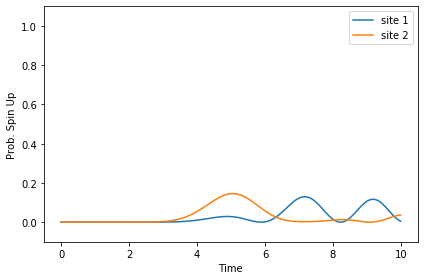

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

n_plot = 2
labels = ["site %i" % (i+1) for i in range(n_plot)]

fig = plt.figure()
for i in range(n_plot):
    plt.plot(times, data[:, i], label=labels[i])
plt.ylabel('Prob. Spin Up')
plt.xlabel('Time')
plt.ylim(-0.1, 1.1)
plt.legend()
fig.tight_layout()


## Part 4: Animation

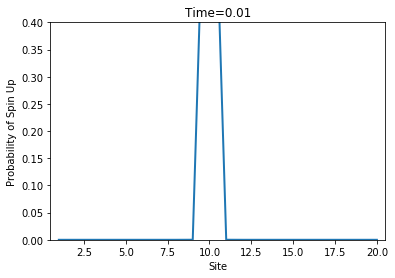

In [4]:
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure()
line, = plt.plot([], [], lw=2)
plt.xlim(0.5, N+0.5)
plt.ylim(0., 8./N)
plt.xlabel('Site')
plt.ylabel('Probability of Spin Up')

def data_gen(t=0):
    cnt = 0
    while cnt < 2000:
        cnt += 1
        t += delta
        yield t, spin_solver.spin_up_t(t)


def run(data):
    # update the data
    t, y = data
    line.set_data(spin_solver.sites, y)
    plt.title("Time=%.2f" % t)
    return line,

ani = animation.FuncAnimation(fig, run, data_gen, interval=200)
HTML(ani.to_html5_video())